In [13]:
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE

In [14]:
df=pd.read_csv('grant_data_imb.csv')
df

,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,...,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,0,97A,30B,A,321024.0,50.0,321013.0,30.0,291502.0,20.0,...,2563.0,25.0,Yes,>10 to 15,2.0,6.0,3.0,5.0,15.0,3.0
1,0,36D,10A,G,300201.0,100.0,0.0,0.0,0.0,0.0,...,1038.0,1.0,NaN,Less than 0,0.0,3.0,0.0,4.0,0.0,0.0
2,0,317A,30D,NaN,321013.0,100.0,0.0,0.0,0.0,0.0,...,2763.0,25.0,Yes,>5 to 10,4.0,3.0,6.0,25.0,14.0,14.0
3,0,62B,10B,B,321103.0,30.0,321105.0,40.0,321204.0,30.0,...,2848.0,25.0,NaN,Less than 0,1.0,2.0,1.0,0.0,0.0,0.0
4,0,1A,10A,NaN,270603.0,60.0,321205.0,30.0,320603.0,10.0,...,2678.0,25.0,Yes,>5 to 10,5.0,14.0,0.0,9.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4108,0,103C,30B,NaN,321022.0,100.0,0.0,0.0,0.0,0.0,...,2773.0,25.0,NaN,>=0 to 5,0.0,1.0,0.0,0.0,0.0,0.0
4109,0,2B,10A,NaN,340208.0,50.0,340499.0,50.0,0.0,0.0,...,1678.0,13.0,Yes,more than 15,0.0,1.0,1.0,5.0,8.0,0.0
4110,1,2B,10A,NaN,320702.0,40.0,270102.0,30.0,320305.0,30.0,...,2653.0,25.0,NaN,>=0 to 5,1.0,0.0,26.0,15.0,9.0,6.0
4111,0,40D,10B,C,NaN,NaN,NaN,NaN,NaN,NaN,...,3248.0,31.0,NaN,>=0 to 5,0.0,1.0,1.0,0.0,0.0,0.0


In [15]:
df.describe()

,Grant.Status,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,RFCD.Code.4,RFCD.Percentage.4,RFCD.Code.5,...,Person.ID.1,Year.of.Birth.1,Dept.No..1,Faculty.No..1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
count,4113.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,...,3.826000e+03,3825.000000,3665.000000,3664.000000,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000
mean,0.207634,314904.682845,74.696860,161386.717104,17.642616,96437.197508,7.089541,6835.177005,0.442512,1767.989878,...,1.717884e+05,1962.684967,2440.684857,23.830786,1.050183,2.427339,3.594877,5.230528,4.118400,2.232619
std,0.405663,47163.318702,26.875419,161577.090361,19.259007,148599.260202,11.937533,45889.060627,3.228834,23598.311088,...,2.542264e+05,9.421352,740.105499,11.346395,1.482831,2.976874,7.155090,7.758928,5.385708,4.349171
min,0.000000,210000.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.620000e+02,1930.000000,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,280401.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.773075e+04,1955.000000,2298.000000,25.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,320801.000000,80.000000,240202.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.123450e+04,1965.000000,2653.000000,25.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000
75%,0.000000,321202.000000,100.000000,320702.000000,30.000000,270208.000000,15.000000,0.000000,0.000000,0.000000,...,1.208682e+05,1970.000000,2813.000000,25.000000,2.000000,3.000000,4.000000,7.000000,6.000000,3.000000
max,1.000000,999999.000000,100.000000,440207.000000,90.000000,440207.000000,70.000000,440105.000000,70.000000,419999.000000,...,1.145967e+06,1985.000000,4418.000000,187.000000,13.000000,24.000000,123.000000,87.000000,59.000000,61.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4113 entries, 0 to 4112
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Grant.Status                            4113 non-null   int64  
 1   Sponsor.Code                            3856 non-null   object 
 2   Grant.Category.Code                     3856 non-null   object 
 3   Contract.Value.Band...see.note.A        1953 non-null   object 
 4   RFCD.Code.1                             3853 non-null   float64
 5   RFCD.Percentage.1                       3853 non-null   float64
 6   RFCD.Code.2                             3853 non-null   float64
 7   RFCD.Percentage.2                       3853 non-null   float64
 8   RFCD.Code.3                             3853 non-null   float64
 9   RFCD.Percentage.3                       3853 non-null   float64
 10  RFCD.Code.4                             3853 non-null   floa

In [4]:
target = df['Grant.Status']
features = df.drop(columns=['Grant.Status'])

In [5]:
numerical_features = features.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    features[feature + '_mean'] = features[feature].fillna(features[feature].mean())
    features[feature + '_zero'] = features[feature].fillna(0)

In [6]:
categorical_features = features.select_dtypes(include=['object']).columns
for feature in categorical_features:
    print(f"{feature}: {features[feature].unique()}")
for feature in categorical_features:
    features[feature] = features[feature].fillna('unknown')

Sponsor.Code: ['97A' '36D' '317A' '62B' '1A' '4D' '2B' '60D' '21A' '149A' '252D' '65A'
 '40D' '24D' '34B' '166B' '6B' '29A' '5A' '141A' nan '32D' '89A' '52D'
 '18B' '33A' '91C' '12D' '20D' '66B' '145A' '179C' '86B' '42B' '183C'
 '112D' '234B' '49A' '437A' '77A' '83C' '93A' '229A' '84D' '196D' '281A'
 '69A' '161A' '51C' '226B' '269A' '188D' '94B' '173A' '221A' '9A' '126B'
 '133A' '101A' '215C' '172D' '138B' '219C' '59C' '315C' '205A' '247C'
 '194B' '15C' '3C' '55C' '204D' '90B' '163C' '307C' '206B' '95C' '7C'
 '180D' '214B' '197A' '349A' '232D' '325A' '266B' '164D' '63C' '228D'
 '187C' '208D' '241A' '48D' '309A' '73A' '28D' '362B' '39C' '67C' '212D'
 '200D' '148D' '154B' '245A' '311C' '105A' '47C' '222B' '137A' '159C'
 '100D' '143C' '193A' '324D' '38B' '75C' '427C' '103C' '415C' '139C'
 '107C' '136D' '11C' '170B' '135C' '203C' '235C' '331C' '259C' '87C'
 '169A' '284D' '198B' '308D' '242B' '174B' '68D' '120D' '347C' '294B'
 '128D' '56D' '202B' '435C' '80D' '130B' '54B' '195C' '285A' '191

In [7]:
features = pd.get_dummies(features, columns=categorical_features, drop_first=True)

In [17]:
features['With.PHD.1'].fillna('No', inplace=True)

KeyError: 'With.PHD.1'

In [8]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

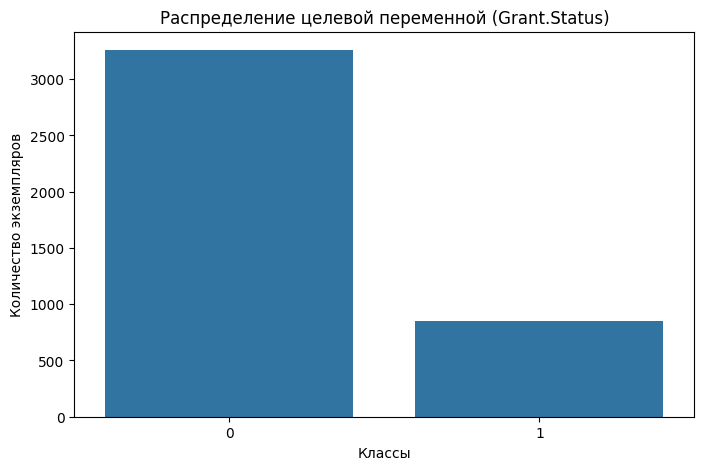

In [10]:
class_distribution = target.value_counts()
# Визуализация распределения
plt.figure(figsize=(8, 5))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Распределение целевой переменной (Grant.Status)')
plt.xlabel('Классы')
plt.ylabel('Количество экземпляров')
plt.show()

In [11]:
if class_distribution.min() / class_distribution.max() < 0.2:  # Например, если классы в 5 раз отличаются
    smote = SMOTE()
    X_resampled, y_resampled = smote.fit_resample(features, target)

    print("Количество экземпляров после SMOTE:")
    print(pd.Series(y_resampled).value_counts())
else:
    print("Классы сбалансированы.")

Классы сбалансированы.
